In [134]:
# only for test
from IPython import get_ipython
get_ipython().magic('reset -sf')  # clear cashes

import csv
import glob, os
import pandas as pd


print('aa')
print(os.path.abspath('.'))




aa
C:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition_wkr\src


In [3]:
# initialisation
# TODO: move all packages here but not for now

# featureDict = {'down': {} , 'up': {}, 'left': {}, 'right': {}, 'fist': {}}
featureDict = {'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}

In [158]:
import csv
import glob, os
import pandas as pd

folderPath = os.path.abspath('./Dataset/new/hyqData/')
filePath = glob.glob(os.path.join(folderPath, "*.csv"))

csvData={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_1={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_2={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_3={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}


currentAction=[]
dl=[]
for f in filePath:
    dl.append(pd.read_csv(f, header=None))
    currentAction.append(f[-5])

for csvFileIndex in range(len(dl)):
    print(csvFileIndex)
    for currentCSV in range(len(dl[csvFileIndex].values.tolist())): # access every recorded sample
        print(currentCSV, end=' ')
        emg_1[currentAction[csvFileIndex]].append(dl[csvFileIndex].values.tolist()[currentCSV][0])
        emg_2[currentAction[csvFileIndex]].append(dl[csvFileIndex].values.tolist()[currentCSV][1])
        emg_3[currentAction[csvFileIndex]].append(dl[csvFileIndex].values.tolist()[currentCSV][2])

# for i in range(len(dl[0].values.tolist())):
#     emg_1[currentAction[i]].append(csvData[currentAction[i]][0][dataIndex][0])
    
# for i in range(5):
#     currentAction.append(filePath[i][-5])
#     for f in filePath:
#         csvData[filePath[i][-5]].append(pd.read_csv(f, header=None).values.tolist())


# print(currentAction)
# print(len(csvData['d'][0]))
# print(len(csvData['u'][0]))
# print(len(csvData['l'][0]))
# print(len(csvData['r'][0]))
# print(len(csvData[currentAction[0]][0][0]))
    
# for i in range(0,len(currentAction)):
#     print(currentAction[i])
#     for dataIndex in range(len(csvData[currentAction[i]][0])):
#         emg_1[currentAction[i]].append(csvData[currentAction[i]][0][dataIndex][0])
    
# print(emg_1['u'][0:100])
# print(emg_1['d'][0:100])
# print(len(emg_1['l']))
# print(len(emg_1['r']))
# print(len(emg_1['f']))
# print(len(csvData[0][0]))
    
#     for fileIndex in range(len())
#     emg_1[f[-5]].append(pd.read_csv(f, header=None).values.tolist()[0])
#     print(emg_1)
    




0


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077 

3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718 3719 3720 3721 3722 

5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354 5355 5356 5357 5358 5359 5360 5361 5362 

6810 6811 6812 6813 6814 6815 6816 6817 6818 6819 6820 6821 6822 6823 6824 6825 6826 6827 6828 6829 6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 6983 6984 6985 6986 6987 6988 6989 6990 6991 6992 6993 6994 6995 6996 6997 6998 6999 7000 7001 7002 7003 7004 7005 7006 7007 7008 7009 

8453 8454 8455 8456 8457 8458 8459 8460 8461 8462 8463 8464 8465 8466 8467 8468 8469 8470 8471 8472 8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 8499 8500 8501 8502 8503 8504 8505 8506 8507 8508 8509 8510 8511 8512 8513 8514 8515 8516 8517 8518 8519 8520 8521 8522 8523 8524 8525 8526 8527 8528 8529 8530 8531 8532 8533 8534 8535 8536 8537 8538 8539 8540 8541 8542 8543 8544 8545 8546 8547 8548 8549 8550 8551 8552 8553 8554 8555 8556 8557 8558 8559 8560 8561 8562 8563 8564 8565 8566 8567 8568 8569 8570 8571 8572 8573 8574 8575 8576 8577 8578 8579 8580 8581 8582 8583 8584 8585 8586 8587 8588 8589 8590 8591 8592 8593 8594 8595 8596 8597 8598 8599 8600 8601 8602 8603 8604 8605 8606 8607 8608 8609 8610 8611 8612 8613 8614 8615 8616 8617 8618 8619 8620 8621 8622 8623 8624 8625 8626 8627 8628 8629 8630 8631 8632 8633 8634 8635 8636 8637 8638 8639 8640 8641 8642 8643 8644 8645 8646 8647 8648 8649 8650 8651 8652 

10080 10081 10082 10083 10084 10085 10086 10087 10088 10089 10090 10091 10092 10093 10094 10095 10096 10097 10098 10099 10100 10101 10102 10103 10104 10105 10106 10107 10108 10109 10110 10111 10112 10113 10114 10115 10116 10117 10118 10119 10120 10121 10122 10123 10124 10125 10126 10127 10128 10129 10130 10131 10132 10133 10134 10135 10136 10137 10138 10139 10140 10141 10142 10143 10144 10145 10146 10147 10148 10149 10150 10151 10152 10153 10154 10155 10156 10157 10158 10159 10160 10161 10162 10163 10164 10165 10166 10167 10168 10169 10170 10171 10172 10173 10174 10175 10176 10177 10178 10179 10180 10181 10182 10183 10184 10185 10186 10187 10188 10189 10190 10191 10192 10193 10194 10195 10196 10197 10198 10199 10200 10201 10202 10203 10204 10205 10206 10207 10208 10209 10210 10211 10212 10213 10214 10215 10216 10217 10218 10219 10220 10221 10222 10223 10224 10225 10226 10227 10228 10229 10230 10231 10232 10233 10234 10235 10236 10237 10238 10239 10240 10241 10242 10243 10244 10245 1024

11450 11451 11452 11453 11454 11455 11456 11457 11458 11459 11460 11461 11462 11463 11464 11465 11466 11467 11468 11469 11470 11471 11472 11473 11474 11475 11476 11477 11478 11479 11480 11481 11482 11483 11484 11485 11486 11487 11488 11489 11490 11491 11492 11493 11494 11495 11496 11497 11498 11499 11500 11501 11502 11503 11504 11505 11506 11507 11508 11509 11510 11511 11512 11513 11514 11515 11516 11517 11518 11519 11520 11521 11522 11523 11524 11525 11526 11527 11528 11529 11530 11531 11532 11533 11534 11535 11536 11537 11538 11539 11540 11541 11542 11543 11544 11545 11546 11547 11548 11549 11550 11551 11552 11553 11554 11555 11556 11557 11558 11559 11560 11561 11562 11563 11564 11565 11566 11567 11568 11569 11570 11571 11572 11573 11574 11575 11576 11577 11578 11579 11580 11581 11582 11583 11584 11585 11586 11587 11588 11589 11590 11591 11592 11593 11594 11595 11596 11597 11598 11599 11600 11601 11602 11603 11604 11605 11606 11607 11608 11609 11610 11611 11612 11613 11614 11615 1161

12816 12817 12818 12819 12820 12821 12822 12823 12824 12825 12826 12827 12828 12829 12830 12831 12832 12833 12834 12835 12836 12837 12838 12839 12840 12841 12842 12843 12844 12845 12846 12847 12848 12849 12850 12851 12852 12853 12854 12855 12856 12857 12858 12859 12860 12861 12862 12863 12864 12865 12866 12867 12868 12869 12870 12871 12872 12873 12874 12875 12876 12877 12878 12879 12880 12881 12882 12883 12884 12885 12886 12887 12888 12889 12890 12891 12892 12893 12894 12895 12896 12897 12898 12899 12900 12901 12902 12903 12904 12905 12906 12907 12908 12909 12910 12911 12912 12913 12914 12915 12916 12917 12918 12919 12920 12921 12922 12923 12924 12925 12926 12927 12928 12929 12930 12931 12932 12933 12934 12935 12936 12937 12938 12939 12940 12941 12942 12943 12944 12945 12946 12947 12948 12949 12950 12951 12952 12953 12954 12955 12956 12957 12958 12959 12960 12961 12962 12963 12964 12965 12966 12967 12968 12969 12970 12971 12972 12973 12974 12975 12976 12977 12978 12979 12980 12981 1298

14190 14191 14192 14193 14194 14195 14196 14197 14198 14199 14200 14201 14202 14203 14204 14205 14206 14207 14208 14209 14210 14211 14212 14213 14214 14215 14216 14217 14218 14219 14220 14221 14222 14223 14224 14225 14226 14227 14228 14229 14230 14231 14232 14233 14234 14235 14236 14237 14238 14239 14240 14241 14242 14243 14244 14245 14246 14247 14248 14249 14250 14251 14252 14253 14254 14255 14256 14257 14258 14259 14260 14261 14262 14263 14264 14265 14266 14267 14268 14269 14270 14271 14272 14273 14274 14275 14276 14277 14278 14279 14280 14281 14282 14283 14284 14285 14286 14287 14288 14289 14290 14291 14292 14293 14294 14295 14296 14297 14298 14299 14300 14301 14302 14303 14304 14305 14306 14307 14308 14309 14310 14311 14312 14313 14314 14315 14316 14317 14318 14319 14320 14321 14322 14323 14324 14325 14326 14327 14328 14329 14330 14331 14332 14333 14334 14335 14336 14337 14338 14339 14340 14341 14342 14343 14344 14345 14346 14347 14348 14349 14350 14351 14352 14353 14354 14355 1435

15566 15567 15568 15569 15570 15571 15572 15573 15574 15575 15576 15577 15578 15579 15580 15581 15582 15583 15584 15585 15586 15587 15588 15589 15590 15591 15592 15593 15594 15595 15596 15597 15598 15599 15600 15601 15602 15603 15604 15605 15606 15607 15608 15609 15610 15611 15612 15613 15614 15615 15616 15617 15618 15619 15620 15621 15622 15623 15624 15625 15626 15627 15628 15629 15630 15631 15632 15633 15634 15635 15636 15637 15638 15639 15640 15641 15642 15643 15644 15645 15646 15647 15648 15649 15650 15651 15652 15653 15654 15655 15656 15657 15658 15659 15660 15661 15662 15663 15664 15665 15666 15667 15668 15669 15670 15671 15672 15673 15674 15675 15676 15677 15678 15679 15680 15681 15682 15683 15684 15685 15686 15687 15688 15689 15690 15691 15692 15693 15694 15695 15696 15697 15698 15699 15700 15701 15702 15703 15704 15705 15706 15707 15708 15709 15710 15711 15712 15713 15714 15715 15716 15717 15718 15719 15720 15721 15722 15723 15724 15725 15726 15727 15728 15729 15730 15731 1573

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 

3505 3506 3507 3508 3509 3510 3511 3512 3513 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 

5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 5342 5343 5344 5345 5346 5347 5348 

6791 6792 6793 6794 6795 6796 6797 6798 6799 6800 6801 6802 6803 6804 6805 6806 6807 6808 6809 6810 6811 6812 6813 6814 6815 6816 6817 6818 6819 6820 6821 6822 6823 6824 6825 6826 6827 6828 6829 6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 6983 6984 6985 6986 6987 6988 6989 6990 

8431 8432 8433 8434 8435 8436 8437 8438 8439 8440 8441 8442 8443 8444 8445 8446 8447 8448 8449 8450 8451 8452 8453 8454 8455 8456 8457 8458 8459 8460 8461 8462 8463 8464 8465 8466 8467 8468 8469 8470 8471 8472 8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 8499 8500 8501 8502 8503 8504 8505 8506 8507 8508 8509 8510 8511 8512 8513 8514 8515 8516 8517 8518 8519 8520 8521 8522 8523 8524 8525 8526 8527 8528 8529 8530 8531 8532 8533 8534 8535 8536 8537 8538 8539 8540 8541 8542 8543 8544 8545 8546 8547 8548 8549 8550 8551 8552 8553 8554 8555 8556 8557 8558 8559 8560 8561 8562 8563 8564 8565 8566 8567 8568 8569 8570 8571 8572 8573 8574 8575 8576 8577 8578 8579 8580 8581 8582 8583 8584 8585 8586 8587 8588 8589 8590 8591 8592 8593 8594 8595 8596 8597 8598 8599 8600 8601 8602 8603 8604 8605 8606 8607 8608 8609 8610 8611 8612 8613 8614 8615 8616 8617 8618 8619 8620 8621 8622 8623 8624 8625 8626 8627 8628 8629 8630 

10058 10059 10060 10061 10062 10063 10064 10065 10066 10067 10068 10069 10070 10071 10072 10073 10074 10075 10076 10077 10078 10079 10080 10081 10082 10083 10084 10085 10086 10087 10088 10089 10090 10091 10092 10093 10094 10095 10096 10097 10098 10099 10100 10101 10102 10103 10104 10105 10106 10107 10108 10109 10110 10111 10112 10113 10114 10115 10116 10117 10118 10119 10120 10121 10122 10123 10124 10125 10126 10127 10128 10129 10130 10131 10132 10133 10134 10135 10136 10137 10138 10139 10140 10141 10142 10143 10144 10145 10146 10147 10148 10149 10150 10151 10152 10153 10154 10155 10156 10157 10158 10159 10160 10161 10162 10163 10164 10165 10166 10167 10168 10169 10170 10171 10172 10173 10174 10175 10176 10177 10178 10179 10180 10181 10182 10183 10184 10185 10186 10187 10188 10189 10190 10191 10192 10193 10194 10195 10196 10197 10198 10199 10200 10201 10202 10203 10204 10205 10206 10207 10208 10209 10210 10211 10212 10213 10214 10215 10216 10217 10218 10219 10220 10221 10222 10223 1022

11426 11427 11428 11429 11430 11431 11432 11433 11434 11435 11436 11437 11438 11439 11440 11441 11442 11443 11444 11445 11446 11447 11448 11449 11450 11451 11452 11453 11454 11455 11456 11457 11458 11459 11460 11461 11462 11463 11464 11465 11466 11467 11468 11469 11470 11471 11472 11473 11474 11475 11476 11477 11478 11479 11480 11481 11482 11483 11484 11485 11486 11487 11488 11489 11490 11491 11492 11493 11494 11495 11496 11497 11498 11499 11500 11501 11502 11503 11504 11505 11506 11507 11508 11509 11510 11511 11512 11513 11514 11515 11516 11517 11518 11519 11520 11521 11522 11523 11524 11525 11526 11527 11528 11529 11530 11531 11532 11533 11534 11535 11536 11537 11538 11539 11540 11541 11542 11543 11544 11545 11546 11547 11548 11549 11550 11551 11552 11553 11554 11555 11556 11557 11558 11559 11560 11561 11562 11563 11564 11565 11566 11567 11568 11569 11570 11571 11572 11573 11574 11575 11576 11577 11578 11579 11580 11581 11582 11583 11584 11585 11586 11587 11588 11589 11590 11591 1159

12794 12795 12796 12797 12798 12799 12800 12801 12802 12803 12804 12805 12806 12807 12808 12809 12810 12811 12812 12813 12814 12815 12816 12817 12818 12819 12820 12821 12822 12823 12824 12825 12826 12827 12828 12829 12830 12831 12832 12833 12834 12835 12836 12837 12838 12839 12840 12841 12842 12843 12844 12845 12846 12847 12848 12849 12850 12851 12852 12853 12854 12855 12856 12857 12858 12859 12860 12861 12862 12863 12864 12865 12866 12867 12868 12869 12870 12871 12872 12873 12874 12875 12876 12877 12878 12879 12880 12881 12882 12883 12884 12885 12886 12887 12888 12889 12890 12891 12892 12893 12894 12895 12896 12897 12898 12899 12900 12901 12902 12903 12904 12905 12906 12907 12908 12909 12910 12911 12912 12913 12914 12915 12916 12917 12918 12919 12920 12921 12922 12923 12924 12925 12926 12927 12928 12929 12930 12931 12932 12933 12934 12935 12936 12937 12938 12939 12940 12941 12942 12943 12944 12945 12946 12947 12948 12949 12950 12951 12952 12953 12954 12955 12956 12957 12958 12959 1296

14165 14166 14167 14168 14169 14170 14171 14172 14173 14174 14175 14176 14177 14178 14179 14180 14181 14182 14183 14184 14185 14186 14187 14188 14189 14190 14191 14192 14193 14194 14195 14196 14197 14198 14199 14200 14201 14202 14203 14204 14205 14206 14207 14208 14209 14210 14211 14212 14213 14214 14215 14216 14217 14218 14219 14220 14221 14222 14223 14224 14225 14226 14227 14228 14229 14230 14231 14232 14233 14234 14235 14236 14237 14238 14239 14240 14241 14242 14243 14244 14245 14246 14247 14248 14249 14250 14251 14252 14253 14254 14255 14256 14257 14258 14259 14260 14261 14262 14263 14264 14265 14266 14267 14268 14269 14270 14271 14272 14273 14274 14275 14276 14277 14278 14279 14280 14281 14282 14283 14284 14285 14286 14287 14288 14289 14290 14291 14292 14293 14294 14295 14296 14297 14298 14299 14300 14301 14302 14303 14304 14305 14306 14307 14308 14309 14310 14311 14312 14313 14314 14315 14316 14317 14318 14319 14320 14321 14322 14323 14324 14325 14326 14327 14328 14329 14330 1433

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 

3510 3511 3512 3513 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 3705 3706 3707 3708 3709 

5152 5153 5154 5155 5156 5157 5158 5159 5160 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 

6796 6797 6798 6799 6800 6801 6802 6803 6804 6805 6806 6807 6808 6809 6810 6811 6812 6813 6814 6815 6816 6817 6818 6819 6820 6821 6822 6823 6824 6825 6826 6827 6828 6829 6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 6983 6984 6985 6986 6987 6988 6989 6990 6991 6992 6993 6994 6995 

8437 8438 8439 8440 8441 8442 8443 8444 8445 8446 8447 8448 8449 8450 8451 8452 8453 8454 8455 8456 8457 8458 8459 8460 8461 8462 8463 8464 8465 8466 8467 8468 8469 8470 8471 8472 8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 8499 8500 8501 8502 8503 8504 8505 8506 8507 8508 8509 8510 8511 8512 8513 8514 8515 8516 8517 8518 8519 8520 8521 8522 8523 8524 8525 8526 8527 8528 8529 8530 8531 8532 8533 8534 8535 8536 8537 8538 8539 8540 8541 8542 8543 8544 8545 8546 8547 8548 8549 8550 8551 8552 8553 8554 8555 8556 8557 8558 8559 8560 8561 8562 8563 8564 8565 8566 8567 8568 8569 8570 8571 8572 8573 8574 8575 8576 8577 8578 8579 8580 8581 8582 8583 8584 8585 8586 8587 8588 8589 8590 8591 8592 8593 8594 8595 8596 8597 8598 8599 8600 8601 8602 8603 8604 8605 8606 8607 8608 8609 8610 8611 8612 8613 8614 8615 8616 8617 8618 8619 8620 8621 8622 8623 8624 8625 8626 8627 8628 8629 8630 8631 8632 8633 8634 8635 8636 

10063 10064 10065 10066 10067 10068 10069 10070 10071 10072 10073 10074 10075 10076 10077 10078 10079 10080 10081 10082 10083 10084 10085 10086 10087 10088 10089 10090 10091 10092 10093 10094 10095 10096 10097 10098 10099 10100 10101 10102 10103 10104 10105 10106 10107 10108 10109 10110 10111 10112 10113 10114 10115 10116 10117 10118 10119 10120 10121 10122 10123 10124 10125 10126 10127 10128 10129 10130 10131 10132 10133 10134 10135 10136 10137 10138 10139 10140 10141 10142 10143 10144 10145 10146 10147 10148 10149 10150 10151 10152 10153 10154 10155 10156 10157 10158 10159 10160 10161 10162 10163 10164 10165 10166 10167 10168 10169 10170 10171 10172 10173 10174 10175 10176 10177 10178 10179 10180 10181 10182 10183 10184 10185 10186 10187 10188 10189 10190 10191 10192 10193 10194 10195 10196 10197 10198 10199 10200 10201 10202 10203 10204 10205 10206 10207 10208 10209 10210 10211 10212 10213 10214 10215 10216 10217 10218 10219 10220 10221 10222 10223 10224 10225 10226 10227 10228 1022

11429 11430 11431 11432 11433 11434 11435 11436 11437 11438 11439 11440 11441 11442 11443 11444 11445 11446 11447 11448 11449 11450 11451 11452 11453 11454 11455 11456 11457 11458 11459 11460 11461 11462 11463 11464 11465 11466 11467 11468 11469 11470 11471 11472 11473 11474 11475 11476 11477 11478 11479 11480 11481 11482 11483 11484 11485 11486 11487 11488 11489 11490 11491 11492 11493 11494 11495 11496 11497 11498 11499 11500 11501 11502 11503 11504 11505 11506 11507 11508 11509 11510 11511 11512 11513 11514 11515 11516 11517 11518 11519 11520 11521 11522 11523 11524 11525 11526 11527 11528 11529 11530 11531 11532 11533 11534 11535 11536 11537 11538 11539 11540 11541 11542 11543 11544 11545 11546 11547 11548 11549 11550 11551 11552 11553 11554 11555 11556 11557 11558 11559 11560 11561 11562 11563 11564 11565 11566 11567 11568 11569 11570 11571 11572 11573 11574 11575 11576 11577 11578 11579 11580 11581 11582 11583 11584 11585 11586 11587 11588 11589 11590 11591 11592 11593 11594 1159

 12797 12798 12799 12800 12801 12802 12803 12804 12805 12806 12807 12808 12809 12810 12811 12812 12813 12814 12815 12816 12817 12818 12819 12820 12821 12822 12823 12824 12825 12826 12827 12828 12829 12830 12831 12832 12833 12834 12835 12836 12837 12838 12839 12840 12841 12842 12843 12844 12845 12846 12847 12848 12849 12850 12851 12852 12853 12854 12855 12856 12857 12858 12859 12860 12861 12862 12863 12864 12865 12866 12867 12868 12869 12870 12871 12872 12873 12874 12875 12876 12877 12878 12879 12880 12881 12882 12883 12884 12885 12886 12887 12888 12889 12890 12891 12892 12893 12894 12895 12896 12897 12898 12899 12900 12901 12902 12903 12904 12905 12906 12907 12908 12909 12910 12911 12912 12913 12914 12915 12916 12917 12918 12919 12920 12921 12922 12923 12924 12925 12926 12927 12928 12929 12930 12931 12932 12933 12934 12935 12936 12937 12938 12939 12940 12941 12942 12943 12944 12945 12946 12947 12948 12949 12950 12951 12952 12953 12954 12955 12956 12957 12958 12959 12960 12961 12962 129

14174 14175 14176 14177 14178 14179 14180 14181 14182 14183 14184 14185 14186 14187 14188 14189 14190 14191 14192 14193 14194 14195 14196 14197 14198 14199 14200 14201 14202 14203 14204 14205 14206 14207 14208 14209 14210 14211 14212 14213 14214 14215 14216 14217 14218 14219 14220 14221 14222 14223 14224 14225 14226 14227 14228 14229 14230 14231 14232 14233 14234 14235 14236 14237 14238 14239 14240 14241 14242 14243 14244 14245 14246 14247 14248 14249 14250 14251 14252 14253 14254 14255 14256 14257 14258 14259 14260 14261 14262 14263 14264 14265 14266 14267 14268 14269 14270 14271 14272 14273 14274 14275 14276 14277 14278 14279 14280 14281 14282 14283 14284 14285 14286 14287 14288 14289 14290 14291 14292 14293 14294 14295 14296 14297 14298 14299 14300 14301 14302 14303 14304 14305 14306 14307 14308 14309 14310 14311 14312 14313 14314 14315 14316 14317 14318 14319 14320 14321 14322 14323 14324 14325 14326 14327 14328 14329 14330 14331 14332 14333 14334 14335 14336 14337 14338 14339 1434

15547 15548 15549 15550 15551 15552 15553 15554 15555 15556 15557 15558 15559 15560 15561 15562 15563 15564 15565 15566 15567 15568 15569 15570 15571 15572 15573 15574 15575 15576 15577 15578 15579 15580 15581 15582 15583 15584 15585 15586 15587 15588 15589 15590 15591 15592 15593 15594 15595 15596 15597 15598 15599 15600 15601 15602 15603 15604 15605 15606 15607 15608 15609 15610 15611 15612 15613 15614 15615 15616 15617 15618 15619 15620 15621 15622 15623 15624 15625 15626 15627 15628 15629 15630 15631 15632 15633 15634 15635 15636 15637 15638 15639 15640 15641 15642 15643 15644 15645 15646 15647 15648 15649 15650 15651 15652 15653 15654 15655 15656 15657 15658 15659 15660 15661 15662 15663 15664 15665 15666 15667 15668 15669 15670 15671 15672 15673 15674 15675 15676 15677 15678 15679 15680 15681 15682 15683 15684 15685 15686 15687 15688 15689 15690 15691 15692 15693 15694 15695 15696 15697 15698 15699 15700 15701 15702 15703 15704 15705 15706 15707 15708 15709 15710 15711 15712 1571

16914 16915 16916 16917 16918 16919 16920 16921 16922 16923 16924 16925 16926 16927 16928 16929 16930 16931 16932 16933 16934 16935 16936 16937 16938 16939 16940 16941 16942 16943 16944 16945 16946 16947 16948 16949 16950 16951 16952 16953 16954 16955 16956 16957 16958 16959 16960 16961 16962 16963 16964 16965 16966 16967 16968 16969 16970 16971 16972 16973 16974 16975 16976 16977 16978 16979 16980 16981 16982 16983 16984 16985 16986 16987 16988 16989 16990 16991 16992 16993 16994 16995 16996 16997 16998 16999 17000 17001 17002 17003 17004 17005 17006 17007 17008 17009 17010 17011 17012 17013 17014 17015 17016 17017 17018 17019 17020 17021 17022 17023 17024 17025 17026 17027 17028 17029 17030 17031 17032 17033 17034 17035 17036 17037 17038 17039 17040 17041 17042 17043 17044 17045 17046 17047 17048 17049 17050 17051 17052 17053 17054 17055 17056 17057 17058 17059 17060 17061 17062 17063 17064 17065 17066 17067 17068 17069 17070 17071 17072 17073 17074 17075 17076 17077 17078 17079 1708

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072 

3513 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 3705 3706 3707 3708 3709 3710 3711 3712 

5156 5157 5158 5159 5160 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354 5355 

6795 6796 6797 6798 6799 6800 6801 6802 6803 6804 6805 6806 6807 6808 6809 6810 6811 6812 6813 6814 6815 6816 6817 6818 6819 6820 6821 6822 6823 6824 6825 6826 6827 6828 6829 6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 6983 6984 6985 6986 6987 6988 6989 6990 6991 6992 6993 6994 

8442 8443 8444 8445 8446 8447 8448 8449 8450 8451 8452 8453 8454 8455 8456 8457 8458 8459 8460 8461 8462 8463 8464 8465 8466 8467 8468 8469 8470 8471 8472 8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 8499 8500 8501 8502 8503 8504 8505 8506 8507 8508 8509 8510 8511 8512 8513 8514 8515 8516 8517 8518 8519 8520 8521 8522 8523 8524 8525 8526 8527 8528 8529 8530 8531 8532 8533 8534 8535 8536 8537 8538 8539 8540 8541 8542 8543 8544 8545 8546 8547 8548 8549 8550 8551 8552 8553 8554 8555 8556 8557 8558 8559 8560 8561 8562 8563 8564 8565 8566 8567 8568 8569 8570 8571 8572 8573 8574 8575 8576 8577 8578 8579 8580 8581 8582 8583 8584 8585 8586 8587 8588 8589 8590 8591 8592 8593 8594 8595 8596 8597 8598 8599 8600 8601 8602 8603 8604 8605 8606 8607 8608 8609 8610 8611 8612 8613 8614 8615 8616 8617 8618 8619 8620 8621 8622 8623 8624 8625 8626 8627 8628 8629 8630 8631 8632 8633 8634 8635 8636 8637 8638 8639 8640 8641 

10076 10077 10078 10079 10080 10081 10082 10083 10084 10085 10086 10087 10088 10089 10090 10091 10092 10093 10094 10095 10096 10097 10098 10099 10100 10101 10102 10103 10104 10105 10106 10107 10108 10109 10110 10111 10112 10113 10114 10115 10116 10117 10118 10119 10120 10121 10122 10123 10124 10125 10126 10127 10128 10129 10130 10131 10132 10133 10134 10135 10136 10137 10138 10139 10140 10141 10142 10143 10144 10145 10146 10147 10148 10149 10150 10151 10152 10153 10154 10155 10156 10157 10158 10159 10160 10161 10162 10163 10164 10165 10166 10167 10168 10169 10170 10171 10172 10173 10174 10175 10176 10177 10178 10179 10180 10181 10182 10183 10184 10185 10186 10187 10188 10189 10190 10191 10192 10193 10194 10195 10196 10197 10198 10199 10200 10201 10202 10203 10204 10205 10206 10207 10208 10209 10210 10211 10212 10213 10214 10215 10216 10217 10218 10219 10220 10221 10222 10223 10224 10225 10226 10227 10228 10229 10230 10231 10232 10233 10234 10235 10236 10237 10238 10239 10240 10241 1024

11455 11456 11457 11458 11459 11460 11461 11462 11463 11464 11465 11466 11467 11468 11469 11470 11471 11472 11473 11474 11475 11476 11477 11478 11479 11480 11481 11482 11483 11484 11485 11486 11487 11488 11489 11490 11491 11492 11493 11494 11495 11496 11497 11498 11499 11500 11501 11502 11503 11504 11505 11506 11507 11508 11509 11510 11511 11512 11513 11514 11515 11516 11517 11518 11519 11520 11521 11522 11523 11524 11525 11526 11527 11528 11529 11530 11531 11532 11533 11534 11535 11536 11537 11538 11539 11540 11541 11542 11543 11544 11545 11546 11547 11548 11549 11550 11551 11552 11553 11554 11555 11556 11557 11558 11559 11560 11561 11562 11563 11564 11565 11566 11567 11568 11569 11570 11571 11572 11573 11574 11575 11576 11577 11578 11579 11580 11581 11582 11583 11584 11585 11586 11587 11588 11589 11590 11591 11592 11593 11594 11595 11596 11597 11598 11599 11600 11601 11602 11603 11604 11605 11606 11607 11608 11609 11610 11611 11612 11613 11614 11615 11616 11617 11618 11619 11620 1162

12828 12829 12830 12831 12832 12833 12834 12835 12836 12837 12838 12839 12840 12841 12842 12843 12844 12845 12846 12847 12848 12849 12850 12851 12852 12853 12854 12855 12856 12857 12858 12859 12860 12861 12862 12863 12864 12865 12866 12867 12868 12869 12870 12871 12872 12873 12874 12875 12876 12877 12878 12879 12880 12881 12882 12883 12884 12885 12886 12887 12888 12889 12890 12891 12892 12893 12894 12895 12896 12897 12898 12899 12900 12901 12902 12903 12904 12905 12906 12907 12908 12909 12910 12911 12912 12913 12914 12915 12916 12917 12918 12919 12920 12921 12922 12923 12924 12925 12926 12927 12928 12929 12930 12931 12932 12933 12934 12935 12936 12937 12938 12939 12940 12941 12942 12943 12944 12945 12946 12947 12948 12949 12950 12951 12952 12953 12954 12955 12956 12957 12958 12959 12960 12961 12962 12963 12964 12965 12966 12967 12968 12969 12970 12971 12972 12973 12974 12975 12976 12977 12978 12979 12980 12981 12982 12983 12984 12985 12986 12987 12988 12989 12990 12991 12992 12993 1299

14203 14204 14205 14206 14207 14208 14209 14210 14211 14212 14213 14214 14215 14216 14217 14218 14219 14220 14221 14222 14223 14224 14225 14226 14227 14228 14229 14230 14231 14232 14233 14234 14235 14236 14237 14238 14239 14240 14241 14242 14243 14244 14245 14246 14247 14248 14249 14250 14251 14252 14253 14254 14255 14256 14257 14258 14259 14260 14261 14262 14263 14264 14265 14266 14267 14268 14269 14270 14271 14272 14273 14274 14275 14276 14277 14278 14279 14280 14281 14282 14283 14284 14285 14286 14287 14288 14289 14290 14291 14292 14293 14294 14295 14296 14297 14298 14299 14300 14301 14302 14303 14304 14305 14306 14307 14308 14309 14310 14311 14312 14313 14314 14315 14316 14317 14318 14319 14320 14321 14322 14323 14324 14325 14326 14327 14328 14329 14330 14331 14332 14333 14334 14335 14336 14337 14338 14339 14340 14341 14342 14343 14344 14345 14346 14347 14348 14349 14350 14351 14352 14353 14354 14355 14356 14357 14358 14359 14360 14361 14362 14363 14364 14365 14366 14367 14368 1436

15578 15579 15580 15581 15582 15583 15584 15585 15586 15587 15588 15589 15590 15591 15592 15593 15594 15595 15596 15597 15598 15599 4


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 

3508 3509 3510 3511 3512 3513 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 3705 3706 3707 

5152 5153 5154 5155 5156 5157 5158 5159 5160 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 

6795 6796 6797 6798 6799 6800 6801 6802 6803 6804 6805 6806 6807 6808 6809 6810 6811 6812 6813 6814 6815 6816 6817 6818 6819 6820 6821 6822 6823 6824 6825 6826 6827 6828 6829 6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 6983 6984 6985 6986 6987 6988 6989 6990 6991 6992 6993 6994 

8436 8437 8438 8439 8440 8441 8442 8443 8444 8445 8446 8447 8448 8449 8450 8451 8452 8453 8454 8455 8456 8457 8458 8459 8460 8461 8462 8463 8464 8465 8466 8467 8468 8469 8470 8471 8472 8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 8499 8500 8501 8502 8503 8504 8505 8506 8507 8508 8509 8510 8511 8512 8513 8514 8515 8516 8517 8518 8519 8520 8521 8522 8523 8524 8525 8526 8527 8528 8529 8530 8531 8532 8533 8534 8535 8536 8537 8538 8539 8540 8541 8542 8543 8544 8545 8546 8547 8548 8549 8550 8551 8552 8553 8554 8555 8556 8557 8558 8559 8560 8561 8562 8563 8564 8565 8566 8567 8568 8569 8570 8571 8572 8573 8574 8575 8576 8577 8578 8579 8580 8581 8582 8583 8584 8585 8586 8587 8588 8589 8590 8591 8592 8593 8594 8595 8596 8597 8598 8599 8600 8601 8602 8603 8604 8605 8606 8607 8608 8609 8610 8611 8612 8613 8614 8615 8616 8617 8618 8619 8620 8621 8622 8623 8624 8625 8626 8627 8628 8629 8630 8631 8632 8633 8634 8635 

10067 10068 10069 10070 10071 10072 10073 10074 10075 10076 10077 10078 10079 10080 10081 10082 10083 10084 10085 10086 10087 10088 10089 10090 10091 10092 10093 10094 10095 10096 10097 10098 10099 10100 10101 10102 10103 10104 10105 10106 10107 10108 10109 10110 10111 10112 10113 10114 10115 10116 10117 10118 10119 10120 10121 10122 10123 10124 10125 10126 10127 10128 10129 10130 10131 10132 10133 10134 10135 10136 10137 10138 10139 10140 10141 10142 10143 10144 10145 10146 10147 10148 10149 10150 10151 10152 10153 10154 10155 10156 10157 10158 10159 10160 10161 10162 10163 10164 10165 10166 10167 10168 10169 10170 10171 10172 10173 10174 10175 10176 10177 10178 10179 10180 10181 10182 10183 10184 10185 10186 10187 10188 10189 10190 10191 10192 10193 10194 10195 10196 10197 10198 10199 10200 10201 10202 10203 10204 10205 10206 10207 10208 10209 10210 10211 10212 10213 10214 10215 10216 10217 10218 10219 10220 10221 10222 10223 10224 10225 10226 10227 10228 10229 10230 10231 10232 1023

11436 11437 11438 11439 11440 11441 11442 11443 11444 11445 11446 11447 11448 11449 11450 11451 11452 11453 11454 11455 11456 11457 11458 11459 11460 11461 11462 11463 11464 11465 11466 11467 11468 11469 11470 11471 11472 11473 11474 11475 11476 11477 11478 11479 11480 11481 11482 11483 11484 11485 11486 11487 11488 11489 11490 11491 11492 11493 11494 11495 11496 11497 11498 11499 11500 11501 11502 11503 11504 11505 11506 11507 11508 11509 11510 11511 11512 11513 11514 11515 11516 11517 11518 11519 11520 11521 11522 11523 11524 11525 11526 11527 11528 11529 11530 11531 11532 11533 11534 11535 11536 11537 11538 11539 11540 11541 11542 11543 11544 11545 11546 11547 11548 11549 11550 11551 11552 11553 11554 11555 11556 11557 11558 11559 11560 11561 11562 11563 11564 11565 11566 11567 11568 11569 11570 11571 11572 11573 11574 11575 11576 11577 11578 11579 11580 11581 11582 11583 11584 11585 11586 11587 11588 11589 11590 11591 11592 11593 11594 11595 11596 11597 11598 11599 11600 11601 1160

12803 12804 12805 12806 12807 12808 12809 12810 12811 12812 12813 12814 12815 12816 12817 12818 12819 12820 12821 12822 12823 12824 12825 12826 12827 12828 12829 12830 12831 12832 12833 12834 12835 12836 12837 12838 12839 12840 12841 12842 12843 12844 12845 12846 12847 12848 12849 12850 12851 12852 12853 12854 12855 12856 12857 12858 12859 12860 12861 12862 12863 12864 12865 12866 12867 12868 12869 12870 12871 12872 12873 12874 12875 12876 12877 12878 12879 12880 12881 12882 12883 12884 12885 12886 12887 12888 12889 12890 12891 12892 12893 12894 12895 12896 12897 12898 12899 12900 12901 12902 12903 12904 12905 12906 12907 12908 12909 12910 12911 12912 12913 12914 12915 12916 12917 12918 12919 12920 12921 12922 12923 12924 12925 12926 12927 12928 12929 12930 12931 12932 12933 12934 12935 12936 12937 12938 12939 12940 12941 12942 12943 12944 12945 12946 12947 12948 12949 12950 12951 12952 12953 12954 12955 12956 12957 12958 12959 12960 12961 12962 12963 12964 12965 12966 12967 12968 1296

14171 14172 14173 14174 14175 14176 14177 14178 14179 14180 14181 14182 14183 14184 14185 14186 14187 14188 14189 14190 14191 14192 14193 14194 14195 14196 14197 14198 14199 14200 14201 14202 14203 14204 14205 14206 14207 14208 14209 14210 14211 14212 14213 14214 14215 14216 14217 14218 14219 14220 14221 14222 14223 14224 14225 14226 14227 14228 14229 14230 14231 14232 14233 14234 14235 14236 14237 14238 14239 14240 14241 14242 14243 14244 14245 14246 14247 14248 14249 14250 14251 14252 14253 14254 14255 14256 14257 14258 14259 14260 14261 14262 14263 14264 14265 14266 14267 14268 14269 14270 14271 14272 14273 14274 14275 14276 14277 14278 14279 14280 14281 14282 14283 14284 14285 14286 14287 14288 14289 14290 14291 14292 14293 14294 14295 14296 14297 14298 14299 14300 14301 14302 14303 14304 14305 14306 14307 14308 14309 14310 14311 14312 14313 14314 14315 14316 14317 14318 14319 14320 14321 14322 14323 14324 14325 14326 14327 14328 14329 14330 14331 14332 14333 14334 14335 14336 1433

15542 15543 15544 15545 15546 15547 15548 15549 15550 15551 15552 15553 15554 15555 15556 15557 15558 15559 15560 15561 15562 15563 15564 15565 15566 15567 15568 15569 15570 15571 15572 15573 15574 15575 15576 15577 15578 15579 15580 15581 15582 15583 15584 15585 15586 15587 15588 15589 15590 15591 15592 15593 15594 15595 15596 15597 15598 15599 

In [178]:
# print(len(csvData))
print(len(emg_3['d']))

# emg_1_slice=[]
step=300
emg_1_slice = [emg_1['d'][i:i+step] for i in range(0,len(emg_1['d']),step)]

16500
300


In [64]:

ch1=temp1
ch2=temp2
ch3=temp3
# for i in range(len(temp1)):
#     ch1.append(temp1[i][0])
#     ch2.append(temp1[i][1])
#     ch3.append(temp1[i][2])

temp1_dict={}
for i in range(len(ch1)//300):
    tempList_1=[]
    print(i)
    j=0
    for j in range(300):
        tempList_1.append(ch1[j+i*300])
    temp1_dict[i]=tempList_1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [67]:
# print(tempA.values.tolist()[0])
print(len(temp1))

8098


In [5]:
# load data from csv files
# feature extraction
# TODO: freq-domain features 
# TODO: feature selection
# TODO: normalisation

import math
import numpy as np
import csv
import glob, os
import pandas as pd
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

# locate folers
actionList = ['down', 'up', 'left', 'right', 'fist']
for currentAction in range(len(actionList)):
    filePath1 = os.path.abspath('./Dataset/hyqData/' + actionList[currentAction])
    filePath2 = os.path.abspath('./Dataset/zjhData/' + actionList[currentAction])
    filePath3 = os.path.abspath('./Dataset/sgfData/' + actionList[currentAction])
#     filePath4 = os.path.abspath('./Dataset/znData/' + actionList[currentAction])

    print('Loading action: ' + actionList[currentAction])


    file1 = glob.glob(os.path.join(filePath1, "*.csv"))
#     file2 = glob.glob(os.path.join(filePath2, "*.csv"))
#     file3 = glob.glob(os.path.join(filePath3, "*.csv"))
#     file4 = glob.glob(os.path.join(filePath4, "*.csv"))


    dl = []
    for f in file1:
        dl.append(pd.read_csv(f, header=None))
#     for f in file2:
#         dl.append(pd.read_csv(f, header=None))
#     for f in file3:
#         dl.append(pd.read_csv(f, header=None))
#     for f in file4:
#         dl.append(pd.read_csv(f, header=None))



    # obtain each EMG channel data
    

    featureList = []
    
    fs = 100 # sample frequency
    T = 1/fs # sample rate

    csvFileIndex=0
    currentCSV=0
    for csvFileIndex in range(len(dl)): # access every csv file
        emg_1=[]
        emg_2=[]
        emg_3=[]
        for currentCSV in range(len(dl[csvFileIndex].values.tolist())): # access every recorded sample
            emg_1.append(dl[csvFileIndex].values.tolist()[currentCSV][0])
            emg_2.append(dl[csvFileIndex].values.tolist()[currentCSV][1])
            emg_3.append(dl[csvFileIndex].values.tolist()[currentCSV][2])


        ### calculate time-domain features for every csv file

        # Mean Absolute Value
        mav_emg_1 = 0
        mav_emg_2 = 0
        mav_emg_3 = 0
        # Wavelength
        wl_emg_1 = 0
        wl_emg_2 = 0
        wl_emg_3 = 0
        # Slope Sign Changes
        sscThreshold = 0 # TODO: detemine the threshold
        ssc_emg_1 = 0
        ssc_emg_2 = 0
        ssc_emg_3 = 0
        # Zero Crossing: we don't have, do we?
        zc_emg_1 = 0
        zc_emg_2 = 0
        zc_emg_3 = 0
        # Root Mean Square
        rms_emg_1 = 0.0
        rms_emg_2 = 0.0
        rms_emg_3 = 0.0
        # frequency-domain features
        # Mean Frequency
        meanFreq_emg_1 = 0.0
        meanFreq_emg_2 = 0.0
        meanFreq_emg_3 = 0.0
        # Median Frequency
        medianFreq_emg_1 = 0.0
        medianFreq_emg_2 = 0.0
        medianFreq_emg_3 = 0.0
        # Mean Power
        meanPower_emg_1 = 0.0
        meanPower_emg_2 = 0.0
        meanPower_emg_3 = 0.0
        # Variance of Central Frequency
        vcf_emg_1 = 0.0
        vcf_emg_2 = 0.0
        vcf_emg_3 = 0.0
        
        # some temporary variables
        
        abs_sum_temp1=0
        abs_sum_temp2=0
        abs_sum_temp3=0
        ssc_temp1=0
        ssc_temp2=0
        ssc_temp3=0
        rms_temp1=0.0
        rms_temp2=0.0
        rms_temp3=0.0
        
        freqs_temp1, psd_temp1 = signal.welch(emg_1, fs)
        freqs_temp2, psd_temp2 = signal.welch(emg_2, fs)
        freqs_temp3, psd_temp3 = signal.welch(emg_3, fs)
        nominatorValue_temp1=0
        nominatorValue_temp2=0
        nominatorValue_temp3=0
        denominatorValue_temp1=0
        denominatorValue_temp2=0
        denominatorValue_temp3=0
        sm2_temp1=0
        sm2_temp2=0
        sm2_temp3=0
        
        i=0
        for i in range(len(emg_3)):
            abs_sum_temp1 = abs_sum_temp1 + abs(int(emg_1[i]))
            abs_sum_temp2 = abs_sum_temp2 + abs(int(emg_2[i]))
            abs_sum_temp3 = abs_sum_temp3 + abs(int(emg_3[i]))
            
            rms_temp1 = rms_temp1 + (int(emg_1[i]))**2
            rms_temp2 = rms_temp2 + (int(emg_2[i]))**2
            rms_temp3 = rms_temp3 + (int(emg_3[i]))**2
            
            if(i>0):
                wl_emg_1 = wl_emg_1 + abs(int(emg_1[i]) - int(emg_1[i-1]))
                wl_emg_2 = wl_emg_2 + abs(int(emg_2[i]) - int(emg_2[i-1]))
                wl_emg_3 = wl_emg_3 + abs(int(emg_3[i]) - int(emg_3[i-1]))
            if(i>1):
                ssc_temp1 = (int(emg_1[i-1]) - int(emg_1[i-2])) * (int(emg_1[i-1]) - int(emg_1[i]))
                ssc_temp2 = (int(emg_2[i-1]) - int(emg_2[i-2])) * (int(emg_2[i-1]) - int(emg_2[i]))
                ssc_temp3 = (int(emg_3[i-1]) - int(emg_3[i-2])) * (int(emg_3[i-1]) - int(emg_3[i]))
                if ssc_temp1 >= sscThreshold:
                    ssc_emg_1 = ssc_emg_1 + 1
                if ssc_temp2 >= sscThreshold:
                    ssc_emg_2 = ssc_emg_2 + 1
                if ssc_temp3 >= sscThreshold:
                    ssc_emg_3 = ssc_emg_3 + 1
            
            mav_emg_1 = abs_sum_temp1/len(emg_1)
            mav_emg_2 = abs_sum_temp2/len(emg_2)
            mav_emg_3 = abs_sum_temp3/len(emg_3)

            rms_emg_1 = math.sqrt(rms_temp1/len(emg_1))
            rms_emg_2 = math.sqrt(rms_temp2/len(emg_2))
            rms_emg_3 = math.sqrt(rms_temp3/len(emg_3))
            
        j=0
        for j in range(len(freqs_temp1)):
            nominatorValue_temp1 += freqs_temp1[j]*psd_temp1[j]
            nominatorValue_temp2 += freqs_temp2[j]*psd_temp2[j]
            nominatorValue_temp3 += freqs_temp3[j]*psd_temp3[j]
            denominatorValue_temp1 += psd_temp1[j]
            denominatorValue_temp2 += psd_temp2[j]
            denominatorValue_temp3 += psd_temp3[j]
            sm2_temp1 += np.square(freqs_temp1[j])*psd_temp1[j]
            sm2_temp2 += np.square(freqs_temp2[j])*psd_temp2[j]
            sm2_temp3 += np.square(freqs_temp3[j])*psd_temp3[j]
            
        meanFreq_emg_1 = nominatorValue_temp1/denominatorValue_temp1
        meanFreq_emg_2 = nominatorValue_temp2/denominatorValue_temp2
        meanFreq_emg_3 = nominatorValue_temp3/denominatorValue_temp3

        medianFreq_emg_1 = freqs_temp1[np.argsort(psd_temp1)[len(psd_temp1)//2]]
        medianFreq_emg_2 = freqs_temp2[np.argsort(psd_temp2)[len(psd_temp2)//2]]
        medianFreq_emg_3 = freqs_temp3[np.argsort(psd_temp3)[len(psd_temp3)//2]]
        
        meanPower_emg_1 = denominatorValue_temp1/len(freqs_temp1)
        meanPower_emg_2 = denominatorValue_temp2/len(freqs_temp2)
        meanPower_emg_3 = denominatorValue_temp3/len(freqs_temp3)
        
        vcf_emg_1 = sm2_temp1/denominatorValue_temp1 - np.square(nominatorValue_temp1/denominatorValue_temp1)
        vcf_emg_2 = sm2_temp2/denominatorValue_temp2 - np.square(nominatorValue_temp2/denominatorValue_temp2)
        vcf_emg_3 = sm2_temp3/denominatorValue_temp3 - np.square(nominatorValue_temp3/denominatorValue_temp3)
            
        featureDict[actionList[currentAction]][csvFileIndex] = [mav_emg_1, mav_emg_2, mav_emg_3, 
                                                                wl_emg_1, wl_emg_2, wl_emg_3, 
                                                                ssc_emg_1, ssc_emg_2, ssc_emg_3, 
                                                                rms_emg_1, rms_emg_2, rms_emg_3, 
                                                                meanFreq_emg_1, meanFreq_emg_2, meanFreq_emg_3,
                                                                medianFreq_emg_1, medianFreq_emg_2, medianFreq_emg_3,
                                                                meanPower_emg_1, meanPower_emg_2, meanPower_emg_3,
                                                                vcf_emg_1, vcf_emg_2, vcf_emg_3]
        
#         TODO: visualisation
#         print(ssc_emg_1, ssc_emg_2, ssc_emg_3)
#         print(mav_emg_1, mav_emg_2, mav_emg_3)
#         print(wl_emg_1, wl_emg_2, wl_emg_3)
#         print(rms_emg_1, rms_emg_2, rms_emg_3)
#         print(round(meanFreq_emg_1,2), round(medianFreq_emg_1,2), round(meanPower_emg_1,2), round(vcf_emg_1,2))
#         print('processing the next file')

# normalisation
    #featureDict




print('Loading completed')



Loading action: down
Loading action: up
Loading action: left
Loading action: right
Loading action: fist
Loading completed


In [19]:
# print(featureDict['down'][0])
import statistics

currentAction='down'
csvFileIndex=0

for featureIndex in range(len(featureDict[currentAction][0])):
#     tempSum=0
    tempFeatureList=[]
    stdValue=0.0
    meanValue=0.0
    for csvFileIndex in range(len(featureDict[currentAction])):
#         tempSum += featureDict[currentAction][csvFileIndex][featureIndex]
        tempFeatureList.append(featureDict[currentAction][csvFileIndex][featureIndex])
        
    meanValue = statistics.mean(tempFeatureList)
    stdValue = statistics.stdev(tempFeatureList)
    for csvFileIndex in range(len(featureDict[currentAction])):
        featureDict[currentAction][csvFileIndex][featureIndex] = (featureDict[currentAction][csvFileIndex][featureIndex]-meanValue)/stdValue
        




0.6517345443702095
0.47923343458476425
-1.6960441383326488
1.036968652165819
1.1245970114497992
0.5249765403745155
-1.5549569686678757
0.006370967505174706
-0.867708138308612
0.2968121331822655
2.187159757987618
-0.5673467810144671
0.13753794555289361
1.5158934585669421
-0.25926971912928054
-1.1741318349242906
0.7586521651317953
0.6318941611361001
-1.954520242132564
-0.08401300056132033
-0.9454163059755374
-0.09227982690886513
-0.10660899257794348
0.043296125190877416
-0.09283094866536881
down
-0.1666202492447739
0.23524677119716778
-0.9478722190549832
0.49941110631284913
-1.1579390706496338
-0.4659128204130736
0.07154919119197034
0.9757499871863391
-0.032430387523776597
-0.008543187007996108
1.5096991751861228
0.6111188969601723
2.3864999470594515
-0.8495131581076544
0.95467304555477
-1.7923550137599031
0.909006338686367
1.1022116369757615
-0.9436568307286685
0.5429701190180953
-0.8467028992234445
-0.6099385882288052
-1.5253804197600118
-0.6225847532077464
0.17131338158140405
down
2.4

In [101]:
print([round(test,1) for test in featureDict['down'][0]])
print([round(test,1) for test in featureDict['up'][1]])
print([round(test,1) for test in featureDict['left'][2]])
print([round(test,1) for test in featureDict['right'][2]])
print([round(test,1) for test in featureDict['fist'][2]])

[39.7, 55.2, 74.9, 499, 522, 1652, 219, 196, 215, 46.8, 64.4, 170.2, 0.9, 1.2, 0.9, 16.4, 18.0, 41.8, 11.5, 7.0, 199.1, 8.6, 6.5, 1.1]
[21.5, 187.4, 76.3, 163, 1275, 834, 260, 142, 203, 22.2, 230.3, 121.4, 2.3, 0.7, 0.6, 9.4, 14.8, 36.7, 0.5, 374.4, 183.6, 18.5, 0.4, 0.6]
[64.5, 62.7, 14.6, 1209, 765, 178, 210, 186, 253, 117.3, 95.5, 22.1, 0.7, 0.5, 0.9, 36.3, 43.8, 18.0, 34.2, 32.7, 2.0, 1.3, 0.6, 1.1]
[30.0, 72.6, 40.1, 432, 714, 1069, 220, 185, 238, 34.7, 83.7, 102.3, 2.0, 1.0, 1.3, 24.6, 49.2, 17.6, 8.0, 19.9, 181.2, 12.9, 3.1, 1.5]
[36.0, 92.0, 17.7, 1185, 1468, 498, 454, 338, 460, 75.0, 126.8, 33.1, 0.4, 0.6, 0.4, 26.2, 37.9, 16.4, 15.2, 24.2, 3.2, 0.7, 2.6, 1.3]


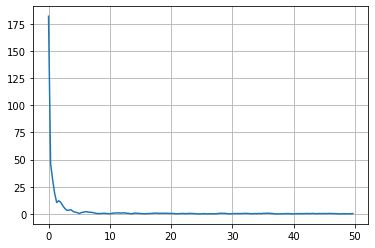

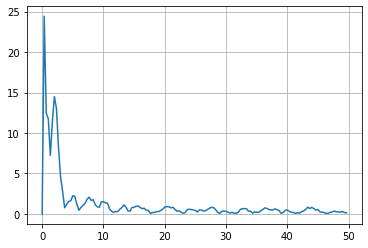

0.8781626790867191
28.90625
21.91596608539089
2.512096817876756


In [40]:
# frequency-domain features
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

# os.path.abspath('./Dataset/hyqData')
# dl = []
# for f in file1:
#     dl.append(pd.read_csv(f, header=None))
    
# emg_1=[]
# emg_2=[]
# emg_3=[]

# for row in range(len(dl[0])):
#     emg_1.append(dl[0].values.tolist()[row][0])
#     emg_2.append(dl[0].values.tolist()[row][1])
#     emg_3.append(dl[0].values.tolist()[row][2])

# mean frequency
meanFreq = 0
# variance of central frequency
VCF=0
# median frequency
medianFreq = 0
# mean power
meanPower = 0



T=1/100 # sample rate
N=len(emg_2)
freqDict={}
yf=fft(emg_2)
xf = fftfreq(N, T)[:N//2] #0.3344 per sample

plt.plot(xf[:], 2.0/N * np.abs(yf[0:N//2][:]))
plt.grid()
plt.show()

detrendSig = signal.detrend(emg_2)
yf=fft(detrendSig)
xf = fftfreq(N, T)[:N//2] #0.3344 per sample
plt.plot(xf[:], 2.0/N * np.abs(yf[0:N//2][:]))
plt.grid()
plt.show()

freqs, psd = signal.welch(signal.detrend(emg_3), 100)
nominatorValue=0
denominatorValue=0
SM2=0
for i in range(len(freqs)):
    nominatorValue += freqs[i]*psd[i]
    denominatorValue += psd[i]
    SM2 += np.square(freqs[i])*psd[i] 
    
meanFreq = nominatorValue/denominatorValue

medianFreq = freqs[np.argsort(psd)[len(psd)//2]]

meanPower = denominatorValue/len(freqs)


VCF = SM2/denominatorValue - np.square(nominatorValue/denominatorValue)

print(meanFreq)
print(medianFreq)
print(meanPower)
print(VCF)


# Pxx_den = np.reshape( Pxx_den, (1,-1) ) 
# width = np.tile(f[1]-f[0], (1, Pxx_den.shape[1]))
# f = np.reshape(f, (1, -1))
# P = Pxx_den * width
# pwr = np.sum(P)
# mnfreq = np.dot(P, f.T)/pwr





In [39]:
listtemp = (2.0/N * np.abs(yf[0:N//2][:]))
print(xf[3]-xf[2]) #

print(len(freqs))


300


In [4]:
# TODO: feature selection
# TODO: visualisation (if possible)

print(featureDict.keys())
print(len(featureDict['down']))
print(len(featureDict['up']))
print(len(featureDict['left']))
print(len(featureDict['right']))
print(len(featureDict['fist']))
print(featureDict['down'][0])
print(featureDict['up'][0])
print(featureDict['left'][0])
print(featureDict['right'][0])
print(featureDict['fist'][0])


dict_keys(['down', 'up', 'left', 'right', 'fist'])
75
70
69
70
75
[39.693333333333335, 55.17666666666667, 74.89666666666666, 499, 522, 1652, 219, 196, 215, 46.753894668430206, 64.37931862536809, 170.15286264611203]
[17.243333333333332, 171.14, 105.74333333333334, 40, 1030, 610, 297, 147, 157, 17.271460081108756, 216.06070134725258, 131.5700700514115]
[52.26, 71.05666666666667, 18.476666666666667, 964, 774, 168, 227, 198, 255, 85.64395289024594, 101.17929630117023, 27.522899556551085]
[59.38, 72.19, 59.7, 966, 705, 1261, 195, 174, 232, 76.48424674401913, 85.48288327690716, 137.3561550616984]
[58.67666666666667, 118.07333333333334, 32.553333333333335, 1285, 1341, 802, 226, 168, 234, 103.38170373265604, 130.02540777350657, 53.41891050929436]


(78, 24)
(78, 6)
(26, 24)
(26, 6)
(26, 24)
(26, 6)
Epoch 1/100
2/2 [==============================] - 0s 197ms/step - loss: 1.8175 - accuracy: 0.1795 - val_loss: 1.7819 - val_accuracy: 0.1923
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7995 - accuracy: 0.1795 - val_loss: 1.7715 - val_accuracy: 0.1923
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7824 - accuracy: 0.1795 - val_loss: 1.7611 - val_accuracy: 0.1923
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7676 - accuracy: 0.1795 - val_loss: 1.7512 - val_accuracy: 0.2308
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7528 - accuracy: 0.1795 - val_loss: 1.7412 - val_accuracy: 0.2308
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7387 - accuracy: 0.1667 - val_loss: 1.7311 - val_accuracy: 0.2308
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7248 - accuracy: 0.1667 - val_loss

Epoch 59/100
2/2 [==============================] - 0s 10ms/step - loss: 0.4380 - accuracy: 0.9231 - val_loss: 0.6298 - val_accuracy: 0.7692
Epoch 60/100
2/2 [==============================] - 0s 10ms/step - loss: 0.4231 - accuracy: 0.9231 - val_loss: 0.6143 - val_accuracy: 0.8077
Epoch 61/100
2/2 [==============================] - 0s 10ms/step - loss: 0.4064 - accuracy: 0.9359 - val_loss: 0.6001 - val_accuracy: 0.8077
Epoch 62/100
2/2 [==============================] - 0s 10ms/step - loss: 0.3912 - accuracy: 0.9231 - val_loss: 0.5874 - val_accuracy: 0.8077
Epoch 63/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3766 - accuracy: 0.9231 - val_loss: 0.5768 - val_accuracy: 0.7692
Epoch 64/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3620 - accuracy: 0.9231 - val_loss: 0.5664 - val_accuracy: 0.7692
Epoch 65/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3489 - accuracy: 0.9231 - val_loss: 0.5560 - val_accuracy: 0.7692
Epoch 66/100


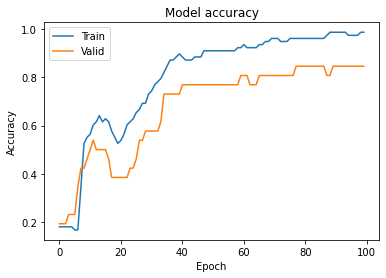

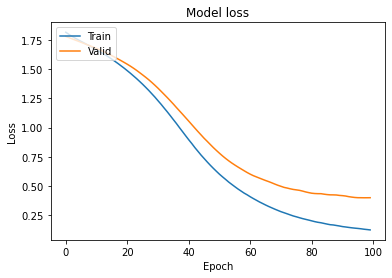

Test loss: 0.17928838729858398
Test accuracy: 0.9615384340286255


In [33]:
# create labels for data samples

from keras.utils import np_utils,normalize
x_val=[]
y_val=[]

def labelSwitch(arg):
    switcher = {
        'left': 1,
        'right': 2,
        'up': 3,
        'down': 4,
        'fist': 5
    }
    return switcher[arg]

i=0
j=''
dictLength=0
current = ['down', 'up', 'left', 'right', 'fist']
for j in range(len(current)):
    for i in range(len(featureDict[current[j]])):
        x_val.append(featureDict[current[j]][i])
        y_val.append(labelSwitch(current[j]))
        dictLength=dictLength+1

x_val_array = np.array(x_val)
y_val_array = np.array(y_val).reshape(dictLength,1)

x_val_array = normalize(x_val_array, axis = 1)

state = np.random.get_state()
np.random.shuffle(x_val_array)
np.random.set_state(state)
np.random.shuffle(y_val_array)


TRAIN_SPLIT = int(0.6*x_val_array.shape[0])
TEST_SPLIT = int(0.2*x_val_array.shape[0] + TRAIN_SPLIT)


x_train, x_test, x_validate = np.split(x_val_array, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_val_array, [TRAIN_SPLIT, TEST_SPLIT])



y_train_class = np_utils.to_categorical(y_train)
y_test_class = np_utils.to_categorical(y_test)
y_validate_class = np_utils.to_categorical(y_validate)


#  see dataset volume

print(x_train.shape)
print(y_train_class.shape)
print(x_validate.shape)
print(y_validate_class.shape)
print(x_test.shape)
print(y_test_class.shape)




# TODO: Model

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
tf.random.set_seed(1234)

model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(x_train.shape)))
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

# opt = RMSprop(lr=0.1, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train_class, epochs=100, batch_size=50, validation_data=(x_validate, y_validate_class))

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [29]:
print(x_val_array)

[[ 0.18027345  0.08682091  0.00612823 ... -0.21879772  0.08699026
   0.21560933]
 [ 0.01910069  0.05002453  0.02607367 ...  0.00733201  0.00377001
   0.00412331]
 [ 0.03101467  0.04163963  0.02961288 ...  0.00311118  0.00190936
   0.00126384]
 ...
 [ 0.02134381  0.04251818  0.03340949 ...  0.00461712  0.00362215
   0.00138281]
 [ 0.01720397  0.04397324  0.00846765 ...  0.00035426  0.00125055
   0.00061595]
 [-0.31584766  0.01453329 -0.16461013 ...  0.23929876 -0.2555866
  -0.04848634]]
